In [310]:
import networkx as nx

### Undirected network

###### # Example 1

In [311]:
g = nx.Graph()

In [312]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [313]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [314]:
g['A']

AtlasView({'B': {}})

### Directed network

###### # Example 2

In [315]:
g = nx.DiGraph()

In [316]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [317]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), OutEdgeView([('A', 'B'), ('B', 'C')]))

In [318]:
g['A']

AtlasView({'B': {}})

### Weighted network

###### # Example 3

In [319]:
g = nx.Graph()

In [320]:
g.add_edge('A', 'B', weight=6)
g.add_edge('B', 'C', weight=13)

In [321]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [322]:
g['A']

AtlasView({'B': {'weight': 6}})

### Signed network 

###### # Example 4

In [323]:
g = nx.Graph()

In [324]:
g.add_edge('A', 'B', sign='+')
g.add_edge('B', 'C', sign='-')

In [325]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [326]:
g['A']

AtlasView({'B': {'sign': '+'}})

### Multigraph

###### # Example 5

In [327]:
g = nx.MultiGraph()

In [328]:
g.add_edge('A', 'B', relation='friend')
g.add_edge('A', 'B', relation='neighbor')

1

In [329]:
g.node(), g.edges()

(NodeView(('A', 'B')), MultiEdgeDataView([('A', 'B'), ('A', 'B')]))

In [330]:
g['A']

AdjacencyView({'B': {0: {'relation': 'friend'}, 1: {'relation': 'neighbor'}}})

### Summary

![summary](./media/graphs.png)

###### # Example 6

In [331]:
g = nx.Graph()

In [332]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [333]:
g.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [334]:
g.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

In [335]:
g.edges(data='relation')

EdgeDataView([('A', 'B', 'family'), ('B', 'C', 'friend')])

In [336]:
g.edges(data='weight')

EdgeDataView([('A', 'B', 6), ('B', 'C', 13)])

In [337]:
g.edges(data='sign')

EdgeDataView([('A', 'B', '+'), ('B', 'C', '-')])

In [338]:
g['A']

AtlasView({'B': {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [339]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [340]:
g['A']['B']['relation']

'family'

In [341]:
if (g['B']['A'] == g['A']['B']): print('OK: This is an UNdirected graph')

OK: This is an UNdirected graph


###### # Example 7

In [342]:
g = nx.DiGraph()

In [343]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [344]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [345]:
try:
    g['B']['A'] == g['A']['B']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


###### # Example 8

In [346]:
g = nx.MultiDiGraph()

In [347]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

0

In [348]:
g['A']['B']

AtlasView({0: {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [349]:
g['A']['B'][0]

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [350]:
g['A']['B'][0]['relation']

'family'

In [351]:
try:
    g['B']['A']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


In [352]:
g.nodes()

NodeView(('A', 'B', 'C'))

In [353]:
g.edges(data=True)

OutMultiEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

### Bipartite Graph

In [354]:
from networkx.algorithms import bipartite

###### # Example 9

In [355]:
b = nx.Graph()

In [356]:
left = 'A B C D E'.split()
right = (1, 2, 3, 4)

In [357]:
b.add_nodes_from(left, bipartite=0)

In [358]:
b.add_nodes_from(right, bipartite=1)

In [359]:
b.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 1, 2, 3, 4))

In [360]:
b.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [361]:
b.edges()

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

- Checking for bipartite graph:

In [363]:
bipartite.is_bipartite(b)

True

In [364]:
b.add_edge('A', 'B')

In [365]:
bipartite.is_bipartite(b)

False

In [366]:
b.remove_edge('A', 'B')

In [367]:
bipartite.is_bipartite(b)

True

- Check if set is one bipartition:

In [369]:
bipartite.is_bipartite_node_set(b, left)

True

In [370]:
bipartite.is_bipartite_node_set(b, right)

True

In [371]:
bipartite.is_bipartite_node_set(b, (1, 2, 3))

False

In [372]:
# FIXME
bipartite.sets(b)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

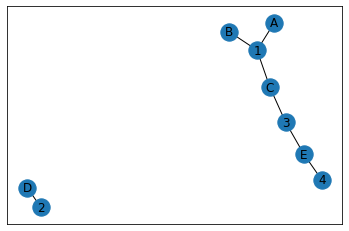

In [373]:
import matplotlib.pyplot as plt
nx.draw_networkx(b)
plt.show()

### Projected graphs

###### # Example 10

In [374]:
# TODO
# bipartite.projected_graph(B,X)

###### # Example 11

In [375]:
# TODO
# bipartite.wighted_projected_graph(B,X)